# Data Analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset 
df = pd.read_csv('ai_job_market_insights.csv')

# Display the first five
print('Head')
print(df.head())

# Get information about the dataset
print('Information')
print(df.info())


Head
               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High        UX/UI Design  107170.263069   
3               Low            High  Project Management   93027.953758   
4               Low             Low          JavaScript   87752.922171   

  Remote_Friendly Job_Growth_Projection  
0             Yes                Growth  
1              No               Decline  
2             Yes    

In [2]:
# Handle categorical features
categorical_features = [
    'Job_Title', 'Industry', 'Company_Size', 'Location',
    'AI_Adoption_Level', 'Automation_Risk', 'Remote_Friendly',
    'Job_Growth_Projection'
]

# Print number of categories for each feature
for col in categorical_features:
    print(f"Number of categories in {col}: {df[col].nunique()}")

Number of categories in Job_Title: 10
Number of categories in Industry: 10
Number of categories in Company_Size: 3
Number of categories in Location: 10
Number of categories in AI_Adoption_Level: 3
Number of categories in Automation_Risk: 3
Number of categories in Remote_Friendly: 2
Number of categories in Job_Growth_Projection: 3


In [3]:
# Calculate expected number of columns
expected_columns = sum([df[col].nunique() for col in categorical_features])
print(f"Expected number of columns: {expected_columns}")

Expected number of columns: 44


In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode categorical features using one-hot encoding
encoder = OneHotEncoder()
encoded_df = pd.DataFrame(encoder.fit_transform(df[categorical_features]).toarray())
encoded_df.columns = encoder.get_feature_names_out(categorical_features)

# Data Cleaning and Preprocessing

In [5]:
# # Convert categorical variables to numerical values
# le = LabelEncoder()
# for col in ['Industry', 'Company_Size', 'Location', 'Remote_Friendly']:
#     df[col] = le.fit_transform(df[col])

# # Handle missing values
# df.fillna(df.mean(), inplace=True)

# Create new features
df['Salary_Band'] = pd.cut(df['Salary_USD'], bins=[0, 50000, 75000, 100000, float('inf')], 
                           labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Calculate average salary by industry
avg_salary_by_industry = df.groupby('Industry')['Salary_USD'].mean().sort_values(ascending=False)


# Data visualization

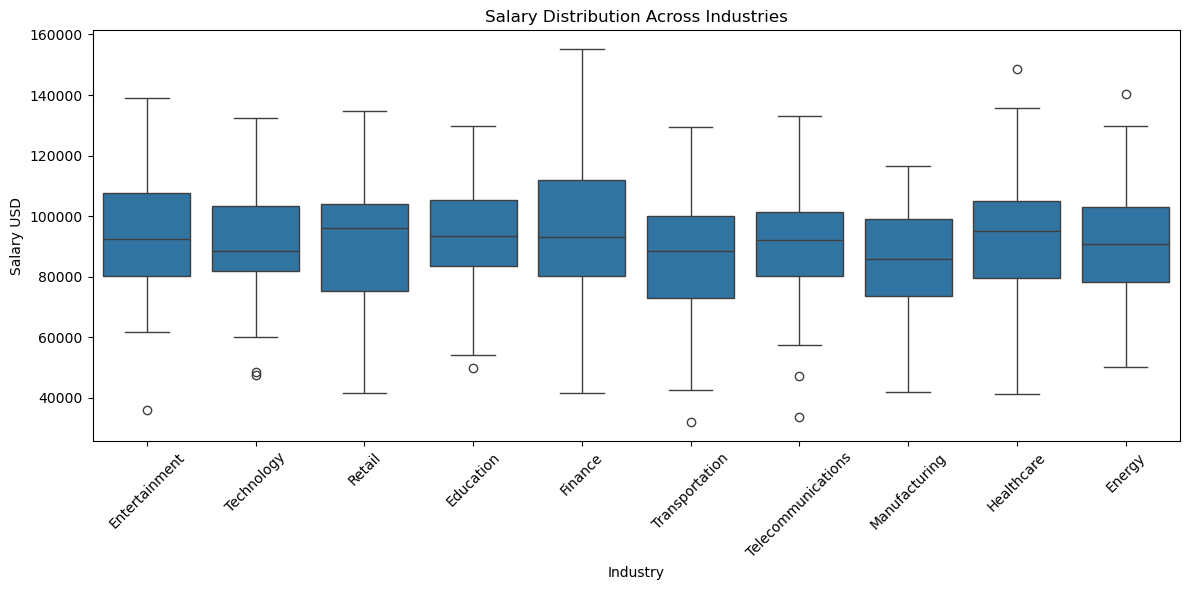

In [6]:
# Plot salary distribution across industries
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='Salary_USD', data=df)
plt.title('Salary Distribution Across Industries')
plt.xlabel('Industry')
plt.ylabel('Salary USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


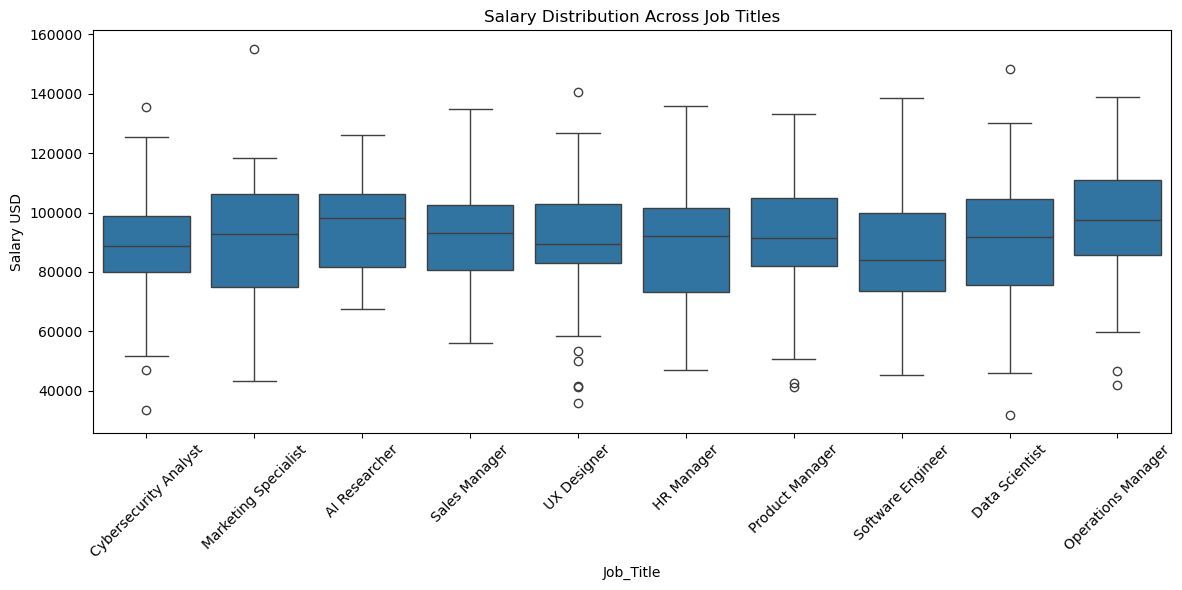

In [7]:
# Plot salary distribution across industries
df_sorted = df.sort_values(by='Salary_USD', ascending=False)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Job_Title', y='Salary_USD', data=df)
plt.title('Salary Distribution Across Job Titles')
plt.xlabel('Job_Title')
plt.ylabel('Salary USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

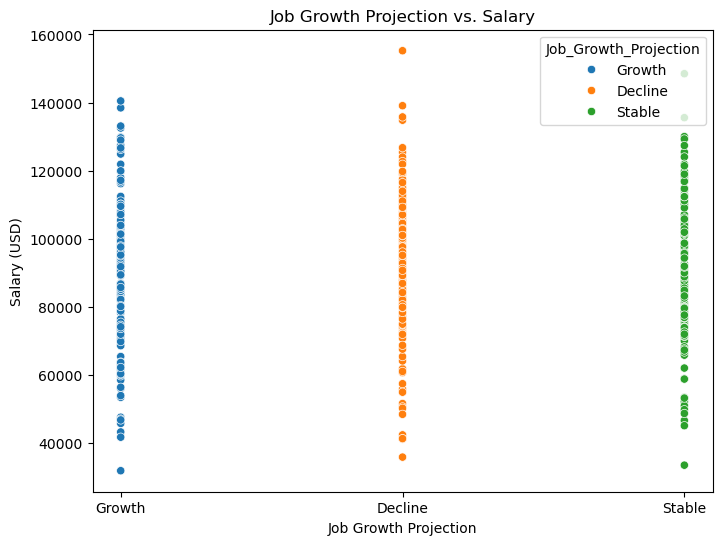

In [8]:
#
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Job_Growth_Projection', y='Salary_USD', data=df, hue='Job_Growth_Projection')
plt.title('Job Growth Projection vs. Salary')
plt.xlabel('Job Growth Projection')
plt.ylabel('Salary (USD)')
plt.show()

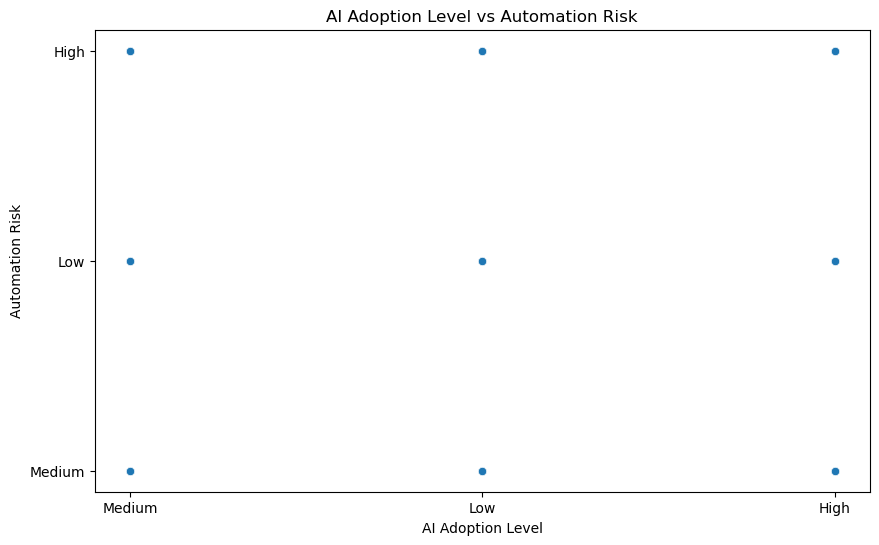

In [9]:
# Plot AI adoption level vs automation risk
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AI_Adoption_Level', y='Automation_Risk', data=df)
plt.title('AI Adoption Level vs Automation Risk')
plt.xlabel('AI Adoption Level')
plt.ylabel('Automation Risk')
plt.show()

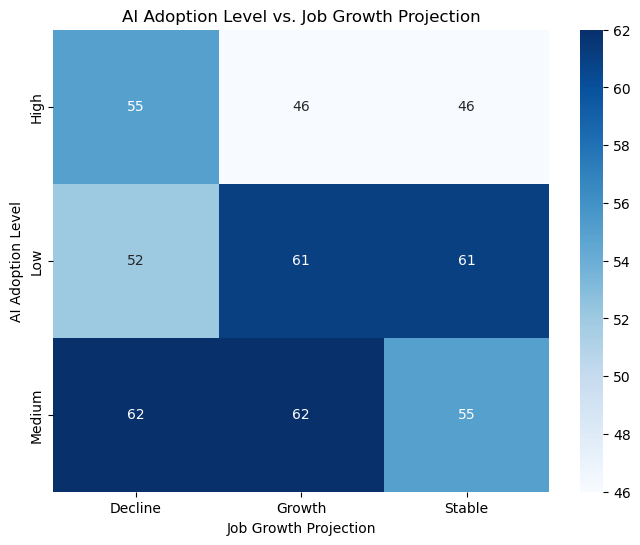

High - Decline: 11.00%
Low - Decline: 10.40%
Medium - Decline: 12.40%
High - Growth: 9.20%
Low - Growth: 12.20%
Medium - Growth: 12.40%
High - Stable: 9.20%
Low - Stable: 12.20%
Medium - Stable: 11.00%


In [10]:
# Create a cross-tabulation of AI adoption level and job growth projection
cross_tab = pd.crosstab(df['AI_Adoption_Level'], df['Job_Growth_Projection'])

# Visualize the relationship using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('AI Adoption Level vs. Job Growth Projection')
plt.xlabel('Job Growth Projection')
plt.ylabel('AI Adoption Level')
plt.show()

# Calculate the percentage of jobs in each category
total_jobs = len(df)
for col in cross_tab.columns:
    for row in cross_tab.index:
        percentage = (cross_tab.loc[row, col] / total_jobs) * 100
        print(f"{row} - {col}: {percentage:.2f}%")

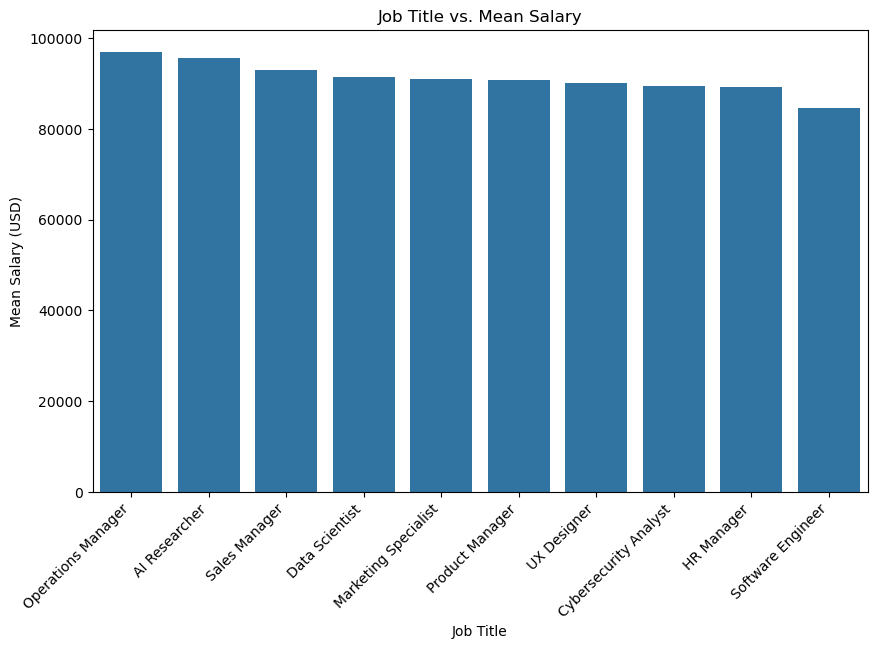

In [11]:
# Group the data by 'Job_Title' and calculate the mean 'Salary_USD'
mean_salary_by_job_title = df.groupby('Job_Title')['Salary_USD'].mean()
mean_salary_by_job_title = mean_salary_by_job_title.sort_values(ascending=False)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_salary_by_job_title.index, y=mean_salary_by_job_title.values)
plt.title('Job Title vs. Mean Salary')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# create model

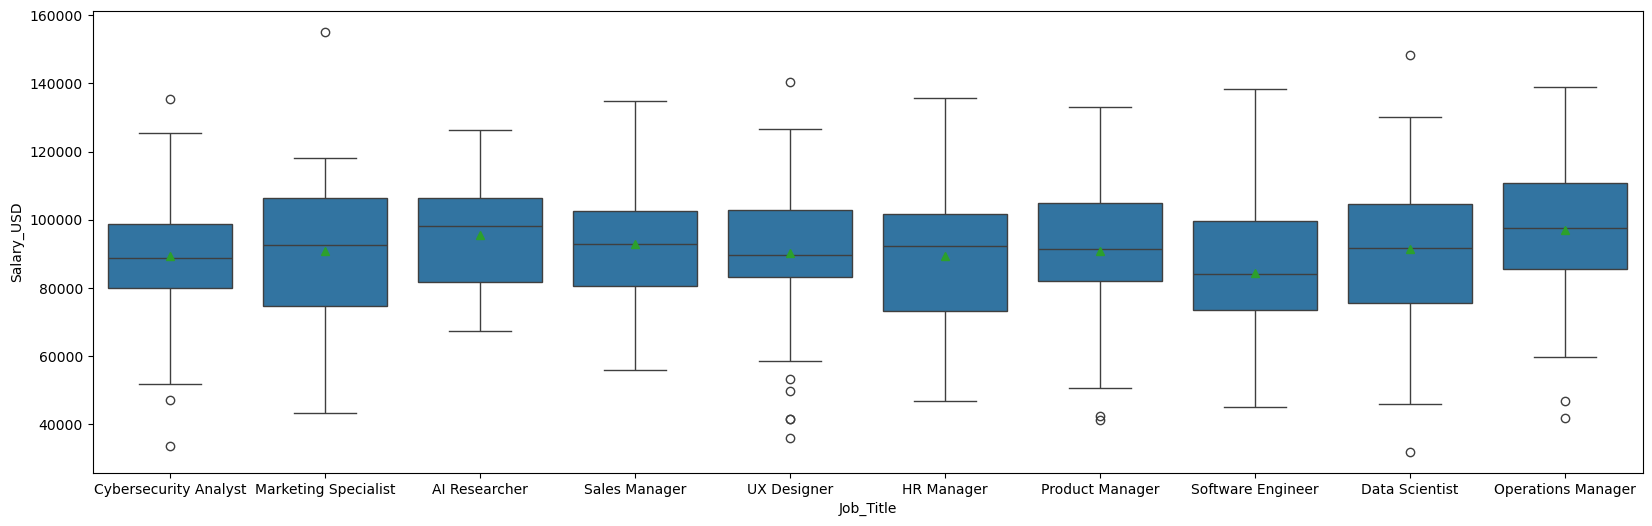

In [12]:
# Convert Salary_USD to numeric (assuming it represents numerical values)
df['Salary_USD'] = pd.to_numeric(df['Salary_USD'], errors='coerce')
plt.figure(figsize=(20, 6))
# Exploratory Data Analysis (boxplots)
sns.boxplot(
    x = "Job_Title",
    y = "Salary_USD",
    showmeans=True,
    data=df,
    
)
plt.show()


In [13]:
from scipy.stats import ttest_ind
# Separate salaries for Cybersecurity Analysts and other job titles
cybersecurity_analyst_salaries = df[df['Job_Title'] == 'Cybersecurity Analyst']['Salary_USD']
other_job_title_salaries = df[df['Job_Title'] != 'Cybersecurity Analyst']['Salary_USD']

# Perform independent t-test
t_stat, p_value = ttest_ind(cybersecurity_analyst_salaries, other_job_title_salaries)

# Set significance level (e.g., alpha = 0.05)
alpha = 0.05

# Test the hypothesis
if p_value < alpha:
    print(f"Reject the hypothesis. Cybersecurity Analysts likely earn significantly different salaries.")
else:
    print(f"Fail to reject the hypothesis. There is no significant difference in salaries.")

# Print the results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

Fail to reject the hypothesis. There is no significant difference in salaries.
t-statistic: -0.6871809242695195
p-value: 0.4922886056440787
